In [1]:
#### TO-DOS ###
# Include tPHATE/Phate EMBEDDINGS OF Latent spaces
# Trajectory comparison of specific intervals
# PCA & ICA comparisons if still applicable

In [1]:
### SETUP ###
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import pickle
from torch.utils.data import DataLoader, Dataset
import warnings
warnings.filterwarnings('ignore')

from SCRIPTS.config import *
from SCRIPTS.dataprep import prepare_interval_data
from SCRIPTS.baseline_interval_model import BaselineIntervalModel
from SCRIPTS.baseline_interval_training import train_baseline_interval_model
from SCRIPTS.cross_validation_experiments import run_baseline_interval_cross_validation
from SCRIPTS.comparison_visualization import compare_pointwise_methods, compare_interval_methods, compare_interval_methods_8D, compare_interval_methods_48D


# Visualization setup
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Set random seed
np.random.seed(42)
torch.manual_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Data path: {COMBINED_SCATTERING}")
print(f"Results path: {BASELINE_RESULTS_DIR}")

Data path: /Users/judesack/Neurospectrum_Creativity/DATA/SCATTERING_COEFFICIENTS/combined_scattering_data.csv
Results path: /Users/judesack/Neurospectrum_Creativity/RESULTS/cross_validation_results/baseline_results


In [3]:
### CONFIGURATION ###

# Run baseline interval cross-validation? T/F
RUN_BASELINE_INTERVAL_CV = False

# Number of CV trials
CV_TRIALS = 5

# Latent dimensions to test
LATENT_DIMS = [8, 48]


In [4]:
### BASELINE INTERVAL CROSS-VALIDATION ###

if RUN_BASELINE_INTERVAL_CV:
    print("\n=== BASELINE INTERVAL CROSS-VALIDATION ===")
    
    baseline_interval_results = {}
    
    for latent_dim in LATENT_DIMS:
        print(f"\n--- LATENT DIMENSION: {latent_dim} ---")
        baseline_interval_results[latent_dim] = {}
        
        for split_type in ['subject', 'time']:
            print(f"\n{split_type.upper()} SPLIT:")
            baseline_interval_results[latent_dim][split_type] = run_baseline_interval_cross_validation(
                data_path=COMBINED_SCATTERING,
                split_type=split_type,
                latent_dim=latent_dim,
                num_trials=CV_TRIALS,
                num_epochs=DEFAULT_EPOCHS,
                recon_weight = LOSS_WEIGHTS['reconstruction']
            )
    
    # Save results
    save_path = BASELINE_RESULTS_DIR / 'baseline_interval_cv_results.pkl'
    with open(save_path, 'wb') as f:
        pickle.dump(baseline_interval_results, f)
    print(f"\n✓ Results saved to {save_path}")
    
    # Display summary
    print("\n=== BASELINE INTERVAL SUMMARY ===")
    for latent_dim in LATENT_DIMS:
        print(f"\n{latent_dim}D Latent Space:")
        print(f"  Subject: {baseline_interval_results[latent_dim]['subject']['mean_accuracy']:.1f}% ± {baseline_interval_results[latent_dim]['subject']['std_accuracy']:.1f}%")
        print(f"  Time: {baseline_interval_results[latent_dim]['time']['mean_accuracy']:.1f}% ± {baseline_interval_results[latent_dim]['time']['std_accuracy']:.1f}%")

else:
    # Load existing results
    baseline_file = BASELINE_RESULTS_DIR / 'baseline_interval_cv_results.pkl'
    
    if baseline_file.exists():
        with open(baseline_file, 'rb') as f:
            baseline_interval_results = pickle.load(f)
        print("✓ Loaded existing baseline interval results")
    else:
        print("No baseline interval results found. Run cross-validation first.")
        baseline_interval_results = None

✓ Loaded existing baseline interval results



=== CREATING POINT-WISE METHOD COMPARISON ===


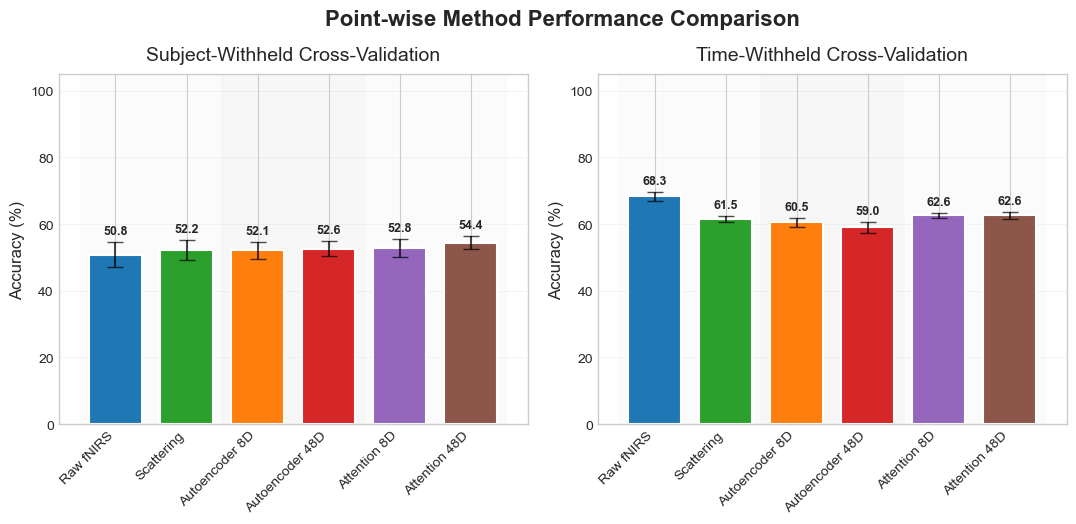

Point-wise comparison saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/method_comparisons/pointwise_comparison.png


In [5]:
### VISUALIZATION: POINT-WISE METHODS ###

print("\n=== CREATING POINT-WISE METHOD COMPARISON ===")
pointwise_results = compare_pointwise_methods()


=== CREATING INTERVAL-BASED METHOD COMPARISON ===


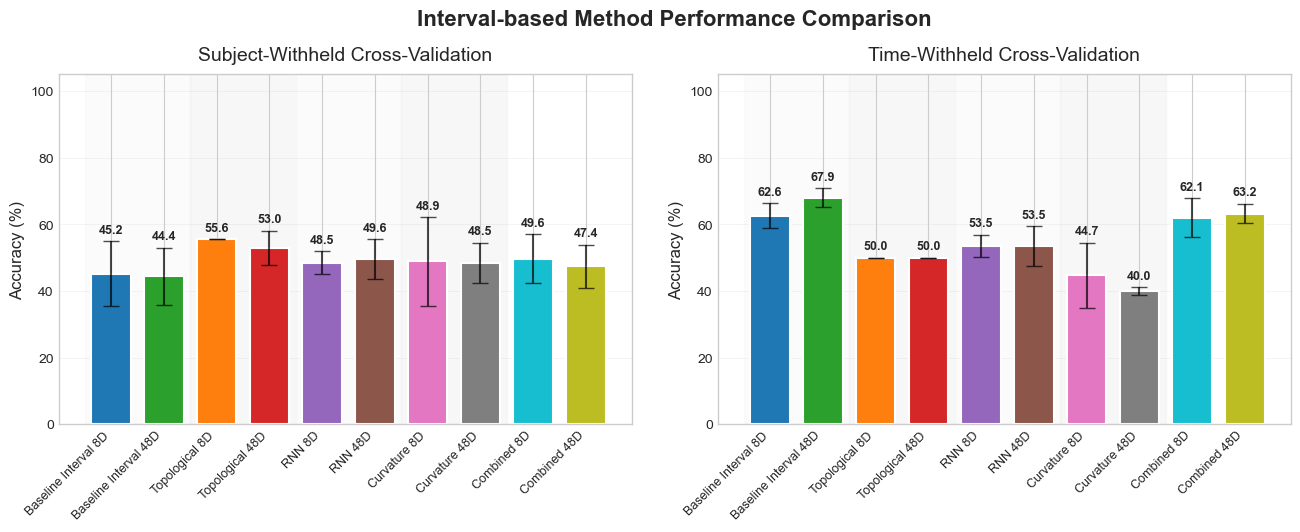

Interval comparison saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/method_comparisons/interval_comparison.png


In [6]:
### VISUALIZATION: INTERVAL-BASED METHODS ###

print("\n=== CREATING INTERVAL-BASED METHOD COMPARISON ===")
interval_results = compare_interval_methods()


## Raw scattering vs. raw fNIRS.


=== CREATING 8D & 48D INTERVAL-BASED METHOD COMPARISON ===


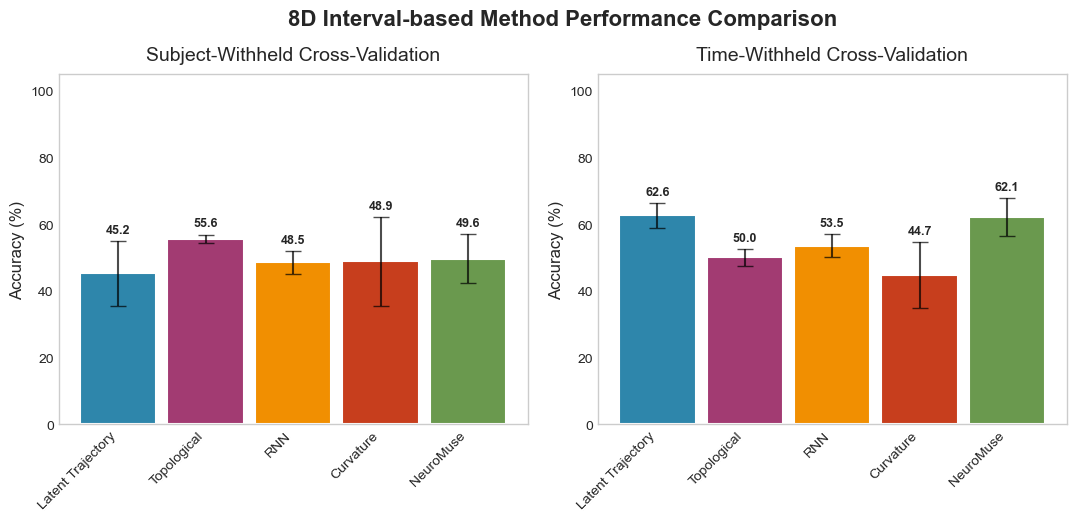

8D Interval comparison saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/method_comparisons/interval_comparison_8D.png


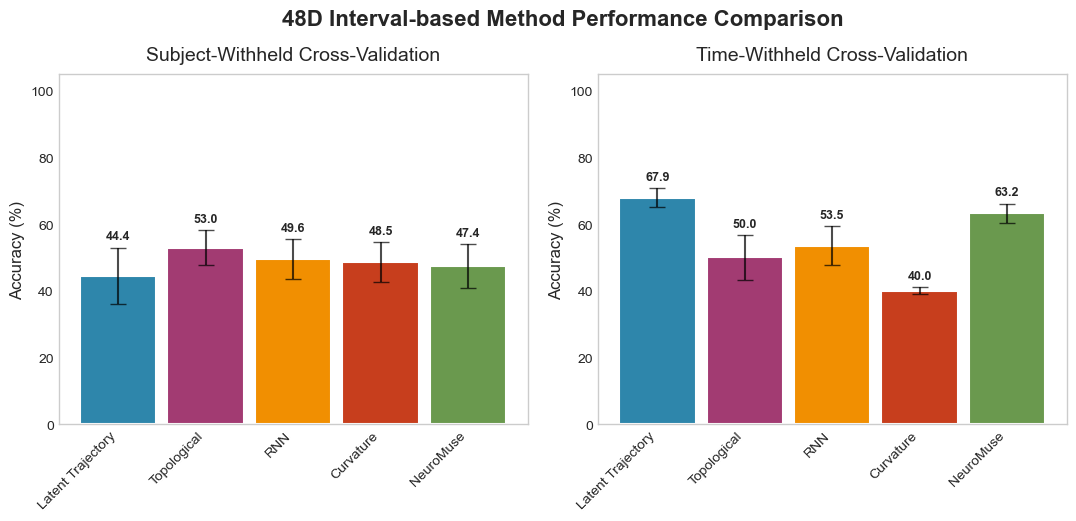

48D Interval comparison saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/method_comparisons/interval_comparison_48D.png


In [2]:

print("\n=== CREATING 8D & 48D INTERVAL-BASED METHOD COMPARISON ===")
interval_results_8D = compare_interval_methods_8D()
interval_results_48D = compare_interval_methods_48D()

Loaded subject weights: range=[0.101, 0.929]

Top 5 nodes for subject-withheld split:
  1. Channel 16 (L-8): 0.9286
  2. Channel 40 (R-8): 0.7595
  3. Channel 45 (R-6): 0.6373
  4. Channel 3 (L-46): 0.6324
  5. Channel 13 (L-9): 0.6192
  6. Channel 35 (R-8): 0.5947
  7. Channel 23 (L-6): 0.5790
  8. Channel 25 (R-10): 0.5629
  9. Channel 0 (L-10): 0.5511
  10. Channel 5 (L-10): 0.5296

Mean attention weights by region for subject-withheld split:
  8: mean=0.4400, std=0.1872, n=15
  45: mean=0.4338, std=0.0000, n=1
  10: mean=0.4070, std=0.1434, n=9
  46: mean=0.4008, std=0.1315, n=5
  6: mean=0.3957, std=0.1444, n=7


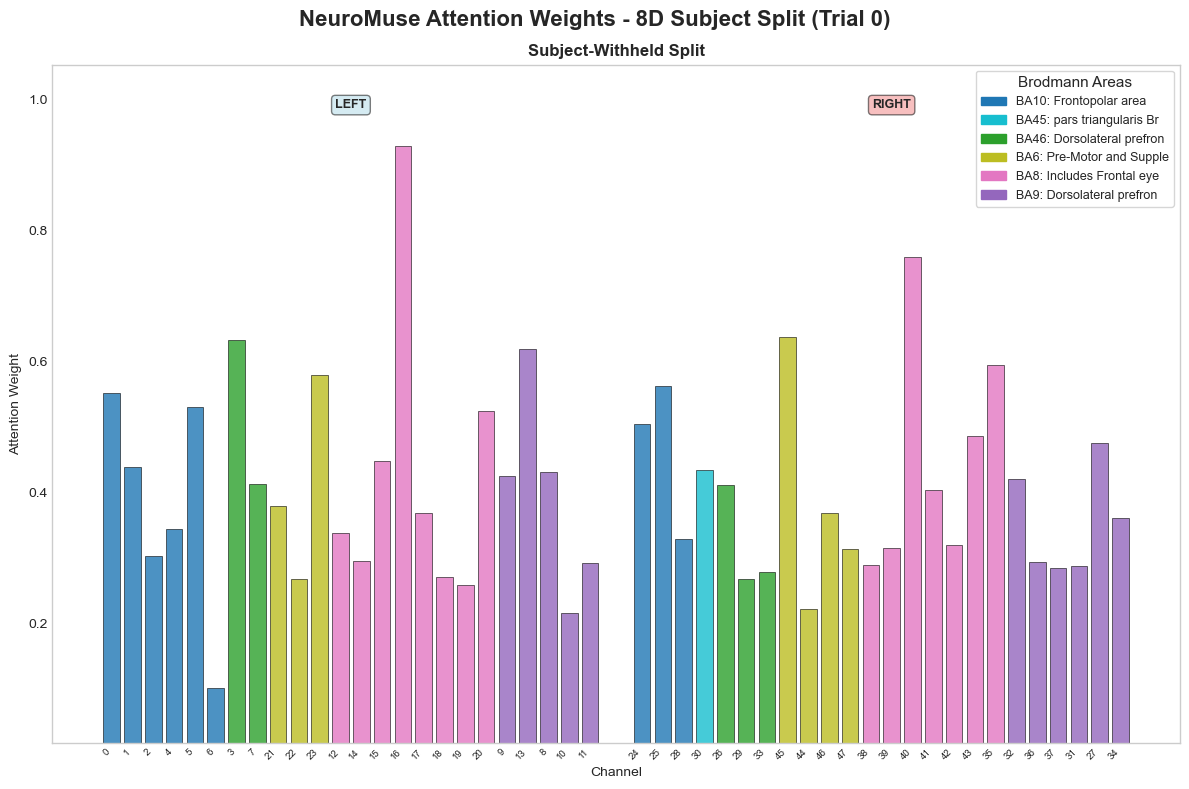


Figure saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/attention_weights/neuromuse_8D_subject_attention.png
Loaded time weights: range=[0.062, 0.684]

Top 5 nodes for time-withheld split:
  1. Channel 27 (R-9): 0.6840
  2. Channel 31 (R-9): 0.6378
  3. Channel 2 (L-10): 0.5817
  4. Channel 24 (R-10): 0.5635
  5. Channel 5 (L-10): 0.5586
  6. Channel 41 (R-8): 0.5466
  7. Channel 16 (L-8): 0.5239
  8. Channel 19 (L-8): 0.5144
  9. Channel 38 (R-8): 0.4864
  10. Channel 42 (R-8): 0.4811

Mean attention weights by region for time-withheld split:
  9: mean=0.3671, std=0.1764, n=11
  10: mean=0.3558, std=0.1703, n=9
  8: mean=0.3463, std=0.1558, n=15
  6: mean=0.3381, std=0.0890, n=7
  46: mean=0.3052, std=0.0818, n=5


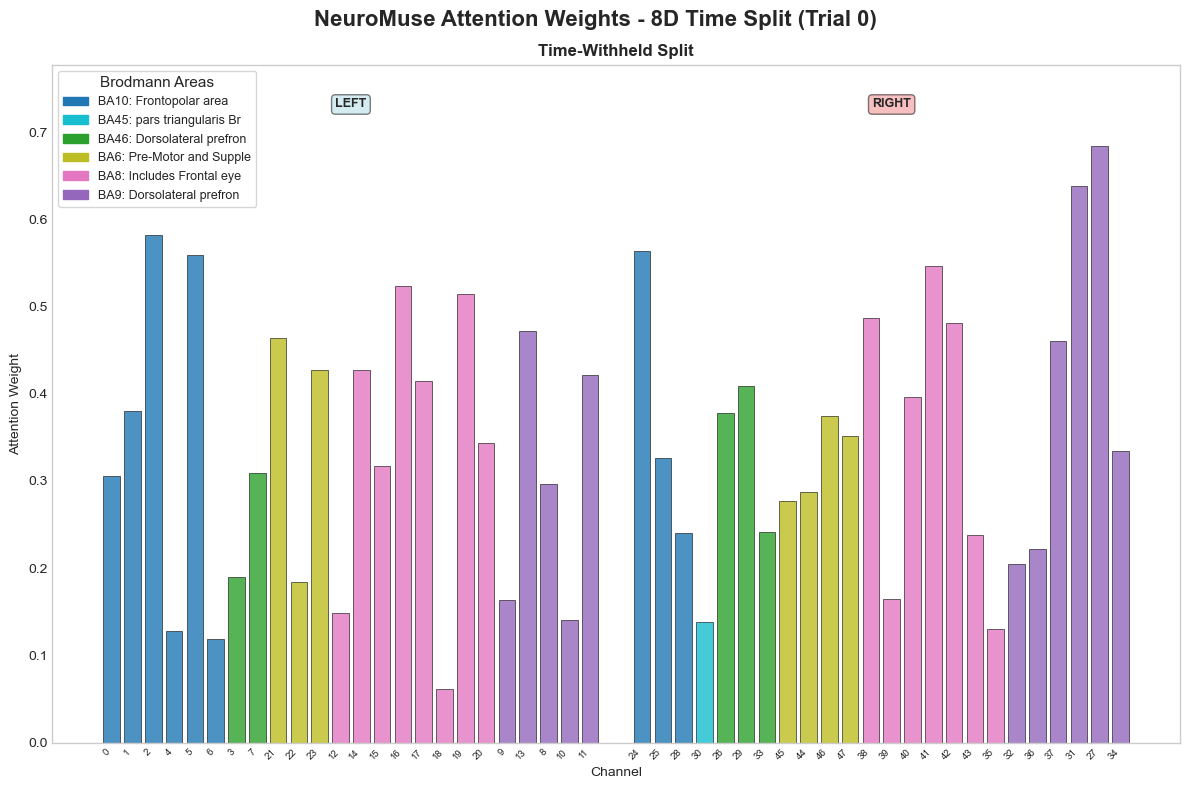


Figure saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/attention_weights/neuromuse_8D_time_attention.png
Loaded subject weights: range=[0.101, 0.929]
Loaded time weights: range=[0.062, 0.684]

Top 5 nodes for subject-withheld split:
  1. Channel 16 (L-8): 0.9286
  2. Channel 40 (R-8): 0.7595
  3. Channel 45 (R-6): 0.6373
  4. Channel 3 (L-46): 0.6324
  5. Channel 13 (L-9): 0.6192
  6. Channel 35 (R-8): 0.5947
  7. Channel 23 (L-6): 0.5790
  8. Channel 25 (R-10): 0.5629
  9. Channel 0 (L-10): 0.5511
  10. Channel 5 (L-10): 0.5296

Mean attention weights by region for subject-withheld split:
  8: mean=0.4400, std=0.1872, n=15
  45: mean=0.4338, std=0.0000, n=1
  10: mean=0.4070, std=0.1434, n=9
  46: mean=0.4008, std=0.1315, n=5
  6: mean=0.3957, std=0.1444, n=7

Top 5 nodes for time-withheld split:
  1. Channel 27 (R-9): 0.6840
  2. Channel 31 (R-9): 0.6378
  3. Channel 2 (L-10): 0.5817
  4. Channel 24 (R-10): 0.5635
  5. Channel 5 (L-10): 0.5586


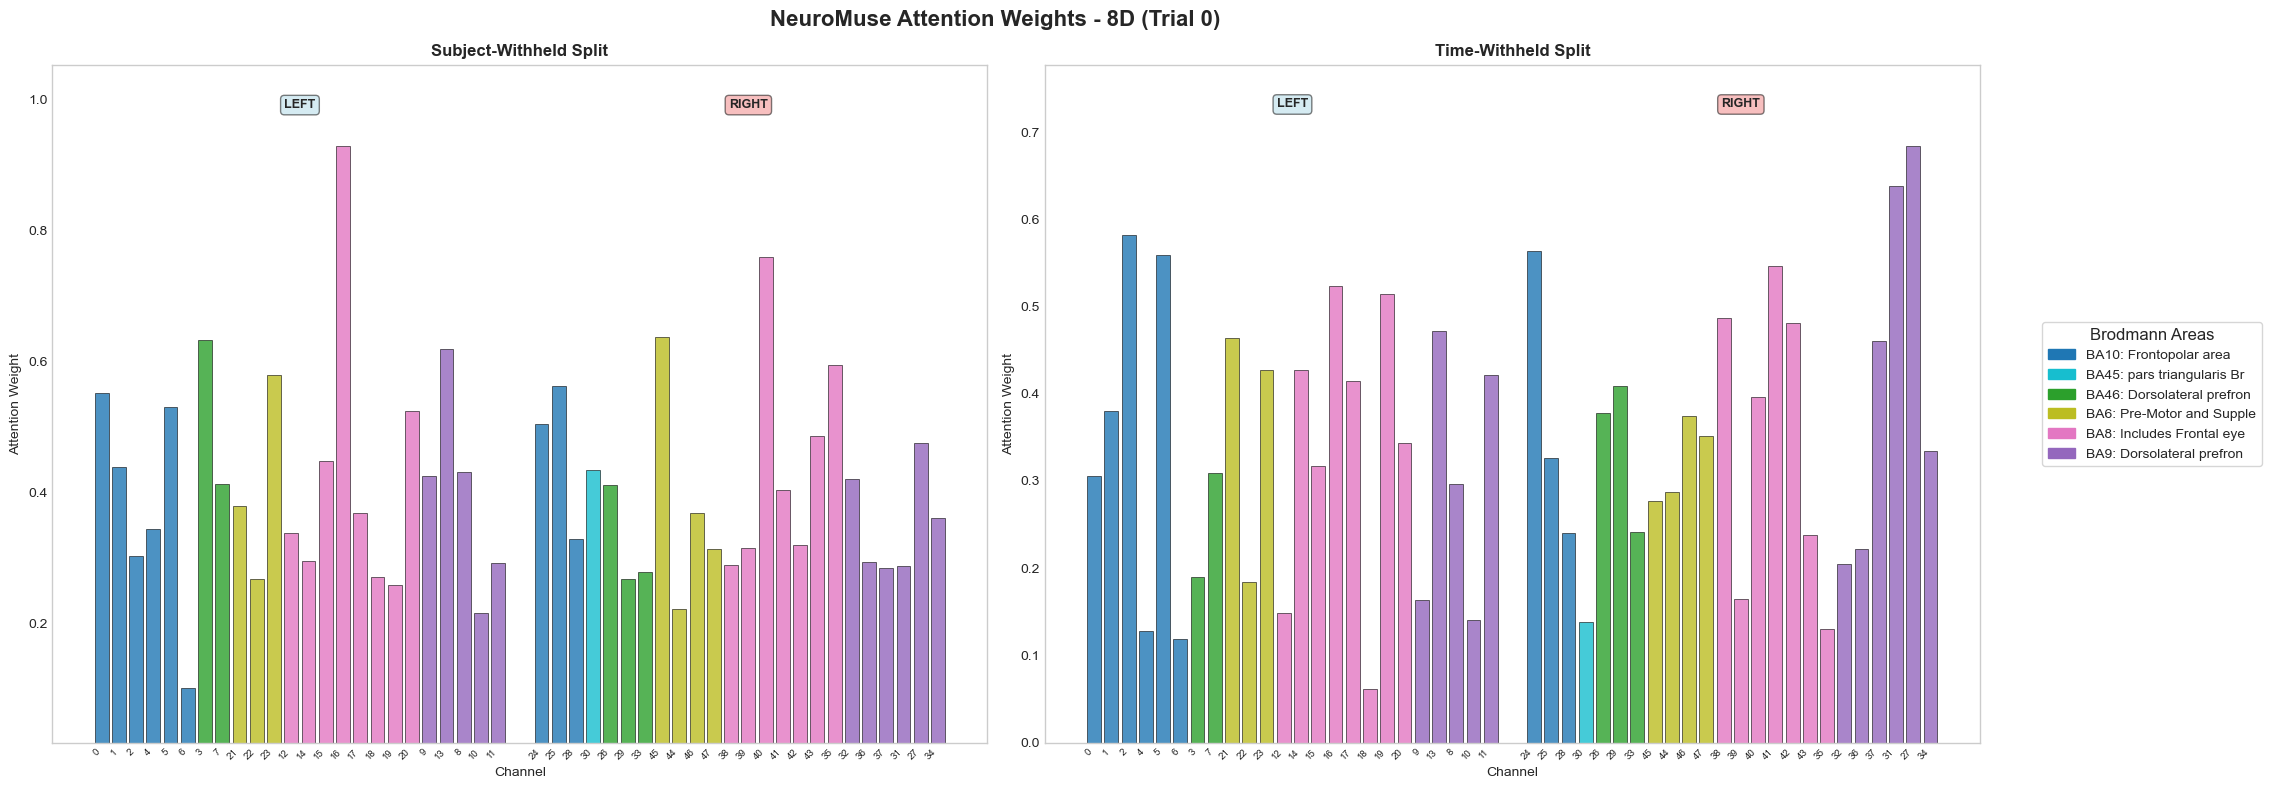


Figure saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/attention_weights/neuromuse_8D_both_attention.png


In [3]:
# Import the function
from SCRIPTS.attention_visualization import compare_attention_splits

fig = compare_attention_splits(
      model_name="NeuroMuse",
      model_dir="combined",
      latent_dim="8D",
      split_types="subject",
      trial=0
  )

fig = compare_attention_splits(
      model_name="NeuroMuse",
      model_dir="combined",
      latent_dim="8D",
      split_types="time",
      trial=0
  )

fig = compare_attention_splits(
      model_name="NeuroMuse",
      model_dir="combined",
      latent_dim="8D",
      split_types="both",
      trial=0
  )
